In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
fp = 'data/raw/concatenated_abridged.jsonl'
data = [json.loads(line) for line in open(fp, 'r')]

In [3]:
tweet_df = pd.DataFrame(data)

In [4]:
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
0,Tue Sep 29 23:59:56 +0000 2020,1311093385688735744,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 117904481, 'id_str': '117904481', 'name...",None,None,None,None,True,1.311081e+18,1311081374510710784,"{'url': 'https://t.co/cQuxzexXYt', 'expanded':...",{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,False,en,NaN,NaN,NaN
1,Tue Sep 29 23:59:58 +0000 2020,1311093394400333824,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 30140760, 'id_str': '30140760', 'name':...",None,None,None,None,True,1.311068e+18,1311068232976080896,"{'url': 'https://t.co/GOhLaDJLeN', 'expanded':...",NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN
2,Wed Sep 30 00:00:00 +0000 2020,1311093401652277252,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 281610530, 'id_str': '281610530', 'name...",None,None,None,None,False,NaN,NaN,NaN,NaN,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN
3,Wed Sep 30 00:00:02 +0000 2020,1311093410737070086,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 88223320, 'id_str': '88223320', 'name':...",None,None,None,None,True,1.311075e+18,1311075316996157441,"{'url': 'https://t.co/CdP89boyMD', 'expanded':...",NaN,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN
4,Wed Sep 30 00:00:04 +0000 2020,1311093419100561408,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 44295160, 'id_str': '44295160', 'name':...",None,None,None,None,False,NaN,NaN,NaN,NaN,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN


In [5]:
tweet_df.shape

(140337, 32)

In [6]:
tweet_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count,favorite_count
count,1.403370e+05,1.911200e+04,2.018100e+04,2.445300e+04,140337.000000,140337.000000
mean,1.311632e+18,1.311030e+18,2.720200e+17,1.292243e+18,21028.815494,4.915340
std,3.196392e+14,1.499556e+16,4.697827e+17,1.109337e+17,66438.946038,661.171293
min,1.311093e+18,7.109434e+17,1.688000e+03,7.464299e+09,0.000000,0.000000
25%,1.311355e+18,1.311300e+18,2.507388e+07,1.311144e+18,2.000000,0.000000
50%,1.311635e+18,1.311515e+18,1.949458e+08,1.311459e+18,859.000000,0.000000
75%,1.311907e+18,1.311869e+18,7.296761e+17,1.311789e+18,11553.000000,0.000000
max,1.312181e+18,1.312180e+18,1.312070e+18,1.312178e+18,452964.000000,189361.000000


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140337 entries, 0 to 140336
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   created_at                 140337 non-null  object 
 1   id                         140337 non-null  int64  
 2   id_str                     140337 non-null  object 
 3   full_text                  140337 non-null  object 
 4   truncated                  140337 non-null  bool   
 5   display_text_range         140337 non-null  object 
 6   entities                   140337 non-null  object 
 7   source                     140337 non-null  object 
 8   in_reply_to_status_id      19112 non-null   float64
 9   in_reply_to_status_id_str  19112 non-null   object 
 10  in_reply_to_user_id        20181 non-null   float64
 11  in_reply_to_user_id_str    20181 non-null   object 
 12  in_reply_to_screen_name    20181 non-null   object 
 13  user                       14

## Takeout obviously needless columns

In [8]:
tweet_df.contributors

0         None
1         None
2         None
3         None
4         None
          ... 
140332    None
140333    None
140334    None
140335    None
140336    None
Name: contributors, Length: 140337, dtype: object

In [9]:
tweet_df.contributors.value_counts()

Series([], Name: contributors, dtype: int64)

In [10]:
def observe_where_notNAN(df, col):
    mask = df[col].apply(lambda x: type(x).__name__) != 'NoneType'
    out = df[mask].copy()
    return out

In [11]:
observe_where_notNAN(tweet_df, 'geo')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
30188,Wed Sep 30 14:44:24 +0000 2020,1311315968908554241,1311315968908554241,Donald Trump refused to denounce white suprema...,False,"[0, 173]","{'hashtags': [{'text': 'BidenHarris2020', 'ind...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 14213115, 'id_str': '14213115', 'name':...","{'type': 'Point', 'coordinates': [33.0, -83.5]}","{'type': 'Point', 'coordinates': [-83.5, 33.0]}","{'id': '7142eb97ae21e839', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN
111464,Fri Oct 02 09:04:54 +0000 2020,1311955307036278784,1311955307036278784,Trump 👥 🙏 💙 🇺🇸 🌎 @ United States https://t.co/...,False,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 964795553610588162, 'id_str': '96479555...","{'type': 'Point', 'coordinates': [40.0, -100.0]}","{'type': 'Point', 'coordinates': [-100.0, 40.0]}","{'id': '27c45d804c777999', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN


In [12]:
observe_where_notNAN(tweet_df, 'coordinates')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
30188,Wed Sep 30 14:44:24 +0000 2020,1311315968908554241,1311315968908554241,Donald Trump refused to denounce white suprema...,False,"[0, 173]","{'hashtags': [{'text': 'BidenHarris2020', 'ind...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 14213115, 'id_str': '14213115', 'name':...","{'type': 'Point', 'coordinates': [33.0, -83.5]}","{'type': 'Point', 'coordinates': [-83.5, 33.0]}","{'id': '7142eb97ae21e839', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN
111464,Fri Oct 02 09:04:54 +0000 2020,1311955307036278784,1311955307036278784,Trump 👥 🙏 💙 🇺🇸 🌎 @ United States https://t.co/...,False,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 964795553610588162, 'id_str': '96479555...","{'type': 'Point', 'coordinates': [40.0, -100.0]}","{'type': 'Point', 'coordinates': [-100.0, 40.0]}","{'id': '27c45d804c777999', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN


In [13]:
tweet_df.drop(columns=['contributors', 'coordinates', 'geo'], inplace=True)

In [14]:
place_df = observe_where_notNAN(tweet_df, 'place')
place_df.place.iloc[0]

{'id': '5c937363480a2c19',
 'url': 'https://api.twitter.com/1.1/geo/id/5c937363480a2c19.json',
 'place_type': 'city',
 'name': 'Cedar Park',
 'full_name': 'Cedar Park, TX',
 'country_code': 'US',
 'country': 'United States',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-97.8816996, 30.4555355],
    [-97.74559, 30.4555355],
    [-97.74559, 30.556381],
    [-97.8816996, 30.556381]]]},
 'attributes': {}}

In [15]:
#looks like we can drop this - also rows where not in US?
place_df.place.apply(lambda d: d['country_code']).value_counts()

US    644
CA     25
GB     16
AU     10
BR      9
NL      7
CO      6
NG      5
AR      5
IT      4
DE      4
ID      3
FR      3
KE      3
IE      2
AE      2
ES      2
MX      2
CL      2
JM      2
TR      2
IN      1
NZ      1
IQ      1
CZ      1
DJ      1
GN      1
EG      1
VN      1
BD      1
ZW      1
CY      1
BE      1
TW      1
DK      1
LU      1
SE      1
UG      1
PY      1
ZA      1
FI      1
Name: place, dtype: int64

In [16]:
tweet_df = tweet_df[tweet_df.place.apply(lambda d: d['country_code'] if type(d).__name__ != 'NoneType' else 'US') == 'US']

In [17]:
#additionally probably drop tweets with these rows?
tweet_df.withheld_in_countries.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[DE]        23
[DE, FR]    10
[IN]         2
[TR]         1
Name: withheld_in_countries, dtype: int64

In [18]:
tweet_df[tweet_df.withheld_in_countries.apply(lambda l: type(l).__name__=='list')].full_text.iloc[1]

'RT @carrieksada: You started this sh!t show Chris Wallace. You and your stupid question on White Supremacists. \nYou are a total dumpster fi…'

In [19]:
#maybe just super aggro? keep for now
tweet_df.drop(columns=['withheld_in_countries'], inplace=True)

## Legit Data Exploration

In [20]:
tweet_df.created_at.value_counts()

Fri Oct 02 07:33:11 +0000 2020    3
Fri Oct 02 23:37:28 +0000 2020    3
Fri Oct 02 05:02:40 +0000 2020    2
Thu Oct 01 14:14:45 +0000 2020    2
Fri Oct 02 05:02:37 +0000 2020    2
                                 ..
Thu Oct 01 09:38:39 +0000 2020    1
Wed Sep 30 13:16:19 +0000 2020    1
Thu Oct 01 22:33:08 +0000 2020    1
Thu Oct 01 07:14:18 +0000 2020    1
Wed Sep 30 23:39:02 +0000 2020    1
Name: created_at, Length: 139847, dtype: int64

In [21]:
tweet_df['created_at'] = pd.to_datetime(tweet_df.created_at)

In [22]:
#Tweets follow initial 3 days following first Pres Debate
tweet_df.created_at.max() - tweet_df.created_at.min()

Timedelta('2 days 23:59:58')

In [23]:
day_dic = {29:0, 30:1, 1:2, 2:3}
tweet_days = tweet_df.created_at.apply(lambda dt: day_dic[dt.day]).hist()

In [24]:
#can also drop these columns
tweet_df.id.nunique()

140203

In [24]:
tweet_df.id_str.nunique()

140203

In [25]:
tweet_df.truncated.value_counts()

False    140203
Name: truncated, dtype: int64

In [26]:
tweet_df.drop(columns=['truncated'], inplace=True)

In [27]:
#This looks like we can drop it
tweet_df.display_text_range.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[0, 140]     49232
[0, 139]      8068
[0, 44]       4680
[0, 144]      2051
[0, 112]      1134
             ...  
[34, 152]        1
[5, 142]         1
[27, 239]        1
[5, 133]         1
[24, 109]        1
Name: display_text_range, Length: 8884, dtype: int64

In [28]:
tweet_df[tweet_df.display_text_range.apply(lambda l: l == [24, 109])].full_text.values

array(['@CheriJacobus @JoeBiden I guess this is more appropriate for today than 4 days ago. \n\nhttps://t.co/XL3GIDKyfW'],
      dtype=object)

In [29]:
tweet_df[tweet_df.display_text_range.apply(lambda l: l == [0, 140])].full_text.values[0]

'RT @KamalaHarris: At 9pm ET tonight, @JoeBiden will face off against Donald Trump in their first of three debates. I know Joe is going to b…'

In [30]:
#doesn't look like this will be of much use either outside of hashtags
tweet_df.entities.iloc[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/cQuxzexXYt',
   'expanded_url': 'https://twitter.com/IngrahamAngle/status/1311081374510710784',
   'display_url': 'twitter.com/IngrahamAngle/…',
   'indices': [72, 95]}]}

In [31]:
hashtags = tweet_df.entities.apply(lambda d: d['hashtags'][0]['text'] if d['hashtags'] else None)
tweet_df['entities'] = hashtags
tweet_df.rename(columns={'entities':'hashtags'}, inplace=True)

In [42]:
#the top 5 values are all twitter integrated/supported
#We should cut off all tweets outside that group 
tweet_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                        62031
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                                                      38560
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                                                                   29655
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                                                          8042
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                                                         459
<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>                                                                   159
<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>                                                                     

In [43]:
legit_sources = ['Twitter for iPhone', 'Twitter for Android', 
                 'Twitter Web App', 'Twitter for iPad', 'TweetDeck']
all_sources = tweet_df.source.apply(lambda s: s.split('>')[1].replace('</a', '') if s else 'None')

In [44]:
num_legit_tweets = tweet_df[all_sources.isin(legit_sources)].shape[0]
num_sketch_tweets = tweet_df[~all_sources.isin(legit_sources)].shape[0]
print (f'Number of good tweets: {num_legit_tweets}\nNumber of unusable tweets: {num_sketch_tweets}')

Number of good tweets: 138747
Number of unusable tweets: 1456


In [45]:
#remove them
tweet_df = tweet_df[all_sources.isin(legit_sources)]

In [46]:
#Doesn't look useful
tweet_df.in_reply_to_status_id.value_counts()

1.311892e+18    914
1.311686e+18    238
1.311731e+18    201
1.311860e+18    164
1.311415e+18    124
               ... 
1.311174e+18      1
1.310995e+18      1
1.311623e+18      1
1.311128e+18      1
1.311533e+18      1
Name: in_reply_to_status_id, Length: 12190, dtype: int64

In [47]:
tweet_df.drop(columns=['in_reply_to_status_id'], inplace=True)

In [48]:
tweet_df.in_reply_to_screen_name.value_counts()

realDonaldTrump    3717
JoeBiden            963
TrumpWarRoom        239
WalshFreedom        139
KamalaHarris        136
                   ... 
glaucia_marotta       1
deKoderofficial       1
lolaannamendez        1
AmyMincey7            1
dazza_double_u        1
Name: in_reply_to_screen_name, Length: 9338, dtype: int64

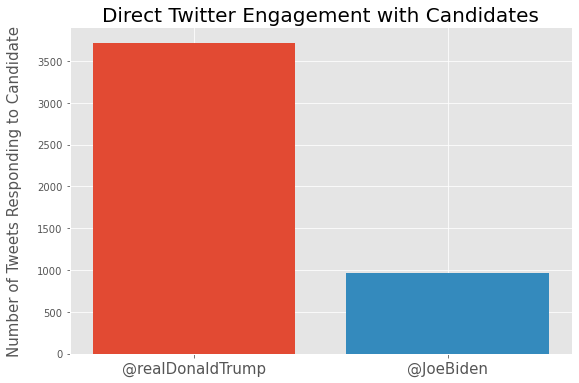

In [49]:
num_tweets_at_DT = tweet_df.in_reply_to_screen_name.value_counts()['realDonaldTrump']
num_tweets_at_JB = tweet_df.in_reply_to_screen_name.value_counts()['JoeBiden']

fig, ax = plt.subplots(figsize=(9, 6))
ax.bar('@realDonaldTrump', num_tweets_at_DT)
ax.bar('@JoeBiden', num_tweets_at_JB)
ax.set_xticklabels(['@realDonaldTrump', '@JoeBiden'], size=15)
ax.set_ylabel('Number of Tweets Responding to Candidate', labelpad=15, size=15)
ax.set_title('Direct Twitter Engagement with Candidates', size=20);

In [50]:
#same thing as numerical value
tweet_df.in_reply_to_status_id_str.value_counts()

1311892190680014849    914
1311685923097260034    238
1311731462589292544    201
1311859538279239686    164
1311414741907116032    124
                      ... 
1312114328833675264      1
1311737448372875264      1
1312001816834473985      1
1311485811481743360      1
1311933069599834112      1
Name: in_reply_to_status_id_str, Length: 12190, dtype: int64

In [51]:
replied_to_tweets = tweet_df[tweet_df.id_str.isin(tweet_df.in_reply_to_status_id_str)].id_str
replied_to_tweets 

9466      1311152034343772160
15784     1311197946247958529
24505     1311270951414370304
48781     1311457668826095616
54654     1311500843309387781
58411     1311530247913787393
59092     1311535943174811648
63701     1311576569836642306
65315     1311592684533018624
70409     1311637029948665857
70468     1311637529343528961
71919     1311649604694347776
82098     1311734211972337664
85737     1311763278583009281
89379     1311791460996526080
96108     1311843440942960640
98783     1311864650665926657
99234     1311868115953823744
99523     1311870409818730496
113031    1311968080151678976
117448    1312003277123252224
136598    1312155475547361281
Name: id_str, dtype: object

In [52]:
replied_counts = tweet_df.in_reply_to_status_id_str.value_counts()
replied_counts[replied_counts.index.isin(replied_to_tweets)]

1311500843309387781    112
1311457668826095616     62
1311763278583009281      3
1311535943174811648      2
1311864650665926657      2
1311649604694347776      1
1311734211972337664      1
1311576569836642306      1
1311791460996526080      1
1311843440942960640      1
1312155475547361281      1
1311152034343772160      1
1312003277123252224      1
1311968080151678976      1
1311592684533018624      1
1311870409818730496      1
1311868115953823744      1
1311637029948665857      1
1311197946247958529      1
1311530247913787393      1
1311637529343528961      1
1311270951414370304      1
Name: in_reply_to_status_id_str, dtype: int64

In [53]:
tweet_df[tweet_df.id.isin([1311500843309387781, 1311457668826095616])].full_text.values

array(['So when will something significant happen to James Comey? Got caught cold. He is either very dumb, or one of the worst liars in political history. TOO LONG. EMBARRASSING!',
       '100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WANT TO REPLACE THEM, BUT WHERE, AND WHAT HAPPENS TO, THE BALLOTS THAT WERE FIRST SENT? THEY WILL BE USED BY SOMEBODY. USA, END THIS SCAM - GO OUT AND VOTE!'],
      dtype=object)

In [54]:
tweet_df[tweet_df.id.isin([1311500843309387781, 1311457668826095616])].user.values

array([{'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/OMxB0x7xC5', 'entities': {'url': {'urls': [{'url': 'https://t.co/OMxB0x7xC5', 'expanded_url': 'http://www.Instagram.com/realDonaldTrump', 'display_url': 'Instagram.com/realDonaldTrump', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 87321922, 'friends_count': 50, 'listed_count': 121569, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'favourites_count': 5, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 57402, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': True, 'profile_background_color': '6D5C18', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https:

In [55]:
tweet_df[tweet_df.user.apply(lambda d: d['screen_name'] == 'realDonaldTrump')]

,created_at,id,id_str,full_text,display_text_range,hashtags,source,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,place,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities
48781,Thu Oct 01 00:07:28 +0000 2020,1311457668826095616,1311457668826095616,So when will something significant happen to J...,"[0, 170]",None,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,False,NaN,NaN,NaN,NaN,37297,148878,False,False,NaN,en,NaN,NaN
54654,Thu Oct 01 02:59:02 +0000 2020,1311500843309387781,1311500843309387781,"100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WA...","[0, 200]",None,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,False,NaN,NaN,NaN,NaN,51146,189361,False,False,NaN,en,NaN,NaN


In [56]:
tweet_df[tweet_df.user.apply(lambda d: d['screen_name'] == 'JoeBiden')]

,created_at,id,id_str,full_text,display_text_range,hashtags,source,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,place,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities


In [57]:
#This column doesn't seem to be of much use
tweet_df.quoted_status_id.value_counts()

1.311719e+18    332
1.311892e+18    268
7.826734e+17    237
1.311783e+18    206
1.311709e+18    181
               ... 
1.311945e+18      1
1.280885e+18      1
1.312025e+18      1
1.311427e+18      1
1.312066e+18      1
Name: quoted_status_id, Length: 9638, dtype: int64

In [58]:
tweet_df.id.value_counts()[tweet_df.id.value_counts().index.isin(tweet_df.quoted_status_id)]

1311705364010799104    1
1311734211972337664    1
1311704852263776256    1
1311857499889373184    1
1311564436801499136    1
1311152034343772160    1
1311236186086821888    1
1312003277123252224    1
Name: id, dtype: int64

In [59]:
tweet_df.lang.value_counts()

en     122713
und      9246
es       2840
pt       1016
fr        639
de        288
in        233
tr        222
ja        213
it        194
tl        158
nl        158
zh         83
th         76
eu         71
pl         68
da         61
ar         49
ht         45
et         44
fa         40
sv         40
hi         38
no         37
ca         32
am         21
fi         16
ro         13
ko         11
ru         11
cs         10
cy          9
hu          8
el          8
vi          5
lt          5
ta          4
iw          4
pa          3
sl          3
ur          2
my          2
uk          2
ml          2
is          1
gu          1
lv          1
hy          1
Name: lang, dtype: int64

In [60]:
tweet_df[tweet_df.lang != 'en']

,created_at,id,id_str,full_text,display_text_range,hashtags,source,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,place,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities
1,Tue Sep 29 23:59:58 +0000 2020,1311093394400333824,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,"[0, 73]",PresidentialDebate,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,None,None,"{'id': 30140760, 'id_str': '30140760', 'name':...",None,True,1.311068e+18,1311068232976080896,"{'url': 'https://t.co/GOhLaDJLeN', 'expanded':...",NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN
9,Wed Sep 30 00:00:13 +0000 2020,1311093457365200896,1311093457365200896,RT @allanldsantos: O tanto de meme que nascerá...,"[0, 90]",None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,NaN,None,None,"{'id': 1256406335249399810, 'id_str': '1256406...",None,False,NaN,NaN,NaN,NaN,592,0,False,False,NaN,pt,{'created_at': 'Tue Sep 29 22:52:22 +0000 2020...,NaN
10,Wed Sep 30 00:00:15 +0000 2020,1311093465682386944,1311093465682386944,RT @ConElMazoDando: Revelan fraude millonario ...,"[0, 140]",MaduroNuestraVozEnLaONU,"<a href=""http://twitter.com/download/android"" ...",None,NaN,None,None,"{'id': 722791404389277696, 'id_str': '72279140...",None,False,NaN,NaN,NaN,NaN,141,0,False,False,False,es,{'created_at': 'Tue Sep 29 12:04:03 +0000 2020...,NaN
17,Wed Sep 30 00:00:29 +0000 2020,1311093523794591744,1311093523794591744,@rodala2904 @eleazar_arocha Las causas de Trum...,"[28, 69]",None,"<a href=""http://twitter.com/download/android"" ...",1311091892914970630,78070693.0,78070693,rodala2904,"{'id': 1247543092565032963, 'id_str': '1247543...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,NaN,es,NaN,NaN
22,Wed Sep 30 00:00:38 +0000 2020,1311093561715240960,1311093561715240960,RT @caroltoonies: #ByeRudy https://t.co/QPLjfd...,"[0, 50]",ByeRudy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,NaN,None,None,"{'id': 1862092777, 'id_str': '1862092777', 'na...",None,True,1.311013e+18,1311013100850753536,"{'url': 'https://t.co/QPLjfdh2eM', 'expanded':...",NaN,3,0,False,False,False,und,{'created_at': 'Tue Sep 29 23:56:45 +0000 2020...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140288,Fri Oct 02 23:58:25 +0000 2020,1312180167633108992,1312180167633108992,"RT @jenniferatntd: Somewhere in #CCP's #China,...","[0, 140]",CCP,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,None,None,"{'id': 1128141217072435201, 'id_str': '1128141...",None,False,NaN,NaN,NaN,NaN,556,0,False,False,NaN,ja,{'created_at': 'Fri Oct 02 16:52:54 +0000 2020...,NaN
140291,Fri Oct 02 23:58:31 +0000 2020,1312180193142874112,1312180193142874112,RT @realDonaldTrump: https://t.co/B4H105KVSs,"[0, 44]",None,"<a href=""http://twitter.com/download/android"" ...",None,NaN,None,None,"{'id': 1254327461954744320, 'id_str': '1254327...",None,False,NaN,NaN,NaN,NaN,131058,0,False,False,False,und,{'created_at': 'Fri Oct 02 22:31:56 +0000 2020...,"{'media': [{'id': 1312158363715764225, 'id_str..."
140310,Fri Oct 02 23:59:01 +0000 2020,1312180319638835201,1312180319638835201,RT @realDonaldTrump: https://t.co/B4H105KVSs,"[0, 44]",None,"<a href=""http://twitter.com/download/android"" ...",None,NaN,None,None,"{'id': 1305201507831250945, 'id_str': '1305201...",None,False,NaN,NaN,NaN,NaN,131058,0,False,False,False,und,{'created_at': 'Fri Oct 02 22:31:56 +0000 2020...,"{'media': [{'id': 1312158363715764225, 'id_str..."
140312,Fri Oct 02 23:59:21 +0000 2020,1312180400953810944,1312180400953810944,RT @realDonaldTrump: https://t.co/B4H105KVSs,"[0, 44]",None,"<a href=""http://twitter.com/#!/download/ipad"" ...",None,NaN,None,None,"{'id': 1018194906, 'id_str': '1018194906', 'na...",None,False,NaN,Na

In [61]:
tweet_df[tweet_df.lang.isna()]

,created_at,id,id_str,full_text,display_text_range,hashtags,source,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,place,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities


In [62]:
#undetermined? mostly @s for rewteet?
tweet_df[tweet_df.lang == 'und'].full_text.values

array(['RT @DarDar458: #PresidentialDebate #Debates2020 #TrumpIsANationalDisgrace',
       'RT @caroltoonies: #ByeRudy https://t.co/QPLjfdh2eM',
       '@PandaGetsHangry @Maximus_4EVR @realDonaldTrump @JoeBiden @skb_sara @AJLovesUSA @KatTheHammer1 @MAGA_Engineer @JillRTeamXRP @trumpwoman2020 @Pickles0201 @US_Threepers https://t.co/AG2TTWOnZB',
       ..., 'RT @realDonaldTrump: https://t.co/B4H105KVSs',
       'RT @realDonaldTrump: https://t.co/B4H105KVSs',
       'RT @realDonaldTrump: https://t.co/B4H105KVSs'], dtype=object)

In [63]:
#probably have to only take english tweets
tweet_df = tweet_df[tweet_df.lang == 'en']

In [64]:
#This doesn't seem to be all that interesting
tweet_df.is_quote_status.value_counts()

False    102275
True      20438
Name: is_quote_status, dtype: int64

In [65]:
tweet_df[tweet_df.is_quote_status].full_text.values

array(['Biden a professional debater??  Hardly!! More like a professional liar! https://t.co/cQuxzexXYt',
       'RT @abbydphillip: Very reminiscent of pre-2018 election raids that coincided with Trump\'s "caravan" message.',
       'RT @saradannerdukic: FYI, Jeni’s is a woman-owned business from Ohio.  She started it from scratch.  One might call it pulling herself up b…',
       ..., 'RT @carlquintanilla: This was four years ago today.',
       'she’s a fucking evil soulless ghoul but has she ever considered that some people hate BOTH what obama did at the border AND what trump is doing ??? and not pull a “i know you are but what am i” https://t.co/Zb9V44ui86',
       "@FoxNews can stick it where the sun doesn't shine. https://t.co/ny6550SLAr"],
      dtype=object)

In [66]:
tweet_df[~tweet_df.is_quote_status].full_text.values

array(['RT @RudyGiuliani: Why was Corrupt Biden’s son being paid MILLIONS by Russian and Chinese COMMUNIST operatives?',
       'RT @KamalaHarris: At 9pm ET tonight, @JoeBiden will face off against Donald Trump in their first of three debates. I know Joe is going to b…',
       "RT @charliekirk11: If Joe Biden can't debate Donald Trump for 90 minutes without taking breaks, he's unfit to be President of the United St…",
       ..., '@ScottAdamsSays Hi, my son died, please vote Joe Biden.',
       'RT @aaronjcarpenter: I can’t stress this enough: if you thought Trump was tough on China before... you ain’t see nothin’ yet. Now it’s pers…',
       'RT @EliseStefanik: Doesn’t get any better than this!\n\nA heartfelt message for @realDonaldTrump from one of his biggest fans, Macy from Sara…'],
      dtype=object)

In [67]:
#LOT OF MISSING VALUES IN THIS COLUMN
tweet_df.extended_entities.isna().sum() / tweet_df.extended_entities.shape

array([0.93565474])

In [68]:
#looks like this is for pix/vidz
tweet_df[~tweet_df.extended_entities.isna()].iloc[3].extended_entities

{'media': [{'id': 1311082517756342276,
   'id_str': '1311082517756342276',
   'indices': [90, 113],
   'media_url': 'http://pbs.twimg.com/media/EjHmmn4XcAQyIvR.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/EjHmmn4XcAQyIvR.jpg',
   'url': 'https://t.co/EhOiWdjh1b',
   'display_url': 'pic.twitter.com/EhOiWdjh1b',
   'expanded_url': 'https://twitter.com/JoeBiden/status/1311084592338735104/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 680, 'h': 508, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 1200, 'h': 897, 'resize': 'fit'},
    'large': {'w': 1528, 'h': 1142, 'resize': 'fit'}},
   'source_status_id': 1311084592338735104,
   'source_status_id_str': '1311084592338735104',
   'source_user_id': 939091,
   'source_user_id_str': '939091',
   'ext_alt_text': None}]}

In [69]:
media = tweet_df.extended_entities.apply(lambda d: d['media'][0]['media_url'] if type(d).__name__ == 'dict' else None)
tweet_df['extended_entities'] = media

In [70]:
#looks like this can be dropped
tweet_df.quoted_status_permalink

0         {'url': 'https://t.co/cQuxzexXYt', 'expanded':...
3         {'url': 'https://t.co/CdP89boyMD', 'expanded':...
4                                                       NaN
5                                                       NaN
6                                                       NaN
                                ...                        
140331                                                  NaN
140333                                                  NaN
140334    {'url': 'https://t.co/ny6550SLAr', 'expanded':...
140335                                                  NaN
140336                                                  NaN
Name: quoted_status_permalink, Length: 122713, dtype: object

In [71]:
tweet_df[tweet_df.possibly_sensitive == True].full_text.values

array(['RT @PeteButtigieg: We’ve got your back tonight, @JoeBiden. https://t.co/N0fDRasehU',
       'RT @chuckwoolery: Joe Biden’s Texas Political Director Implicated In Massive Ballot Harvesting\xa0Scheme https://t.co/HqvxPoaava',
       'Cleveland For Biden 🇺🇸🌊🇺🇸🌊🇺🇸🌊 https://t.co/MLhkQTzuH9',
       'I respect farts. https://t.co/1Sftcpz8wy',
       'RT @realDonaldTrump: Thank you #Truckers4Trump! \nhttps://t.co/leBrV3wo0J',
       'Liberals are lining up to declare Biden the winner of the debate on twitter.  Funny that the DNC thinks twitter is America.  They will find out Nov 3, they have made a fatal mistake.  @EricTrump @DonaldJTrumpJr  #MAGA2020Landslide NUFF SAID, VOTE RED https://t.co/f4MuNnm7UY',
       'Not asking for the World here Donald.. https://t.co/fykcT7e3Yi',
       'Praying that you have the strength to endure all the punishment that you deserve. #MoveTrumpOut https://t.co/zECKRR1YR4',
       'RT @TheLastRefuge2: Forget the debate..... Trump has already won.\n\n😘 ht

In [72]:
tweet_df[tweet_df.possibly_sensitive == True].iloc[1].user

{'id': 615600534,
 'id_str': '615600534',
 'name': 'michael f connor',
 'screen_name': 'Mfc1832F',
 'location': 'delaware',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 44,
 'friends_count': 304,
 'listed_count': 0,
 'created_at': 'Fri Jun 22 20:55:41 +0000 2012',
 'favourites_count': 720,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 5098,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/2356083611/image_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/2356083611/ima

In [73]:
tweet_df.user.iloc[0]

{'id': 117904481,
 'id_str': '117904481',
 'name': 'SharonS',
 'screen_name': 'sfshores53',
 'location': 'America ',
 'description': 'Conservative/#MAGA/ #WWG1WGA /MbrNRA/#Trump2020/Pro-Life/Pro-2nd Amend/parler@SharonA53/ NO DMs-/Patriots-will follow all/will unfollow those who do not follow',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 4065,
 'friends_count': 4998,
 'listed_count': 16,
 'created_at': 'Sat Feb 27 00:36:23 +0000 2010',
 'favourites_count': 3659,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 6156,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '0099B9',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_tile': False,
 'profile_ima

In [74]:
categories = ['location', 'screen_name', 'name', 'description', 'created_at', 'followers_count', 'friends_count', 'verified']
for category in categories:
    values = tweet_df.user.apply(lambda d: d[category])
    if category == 'created_at':
        values = pd.to_datetime(values)
        category = 'acct_created_at'
    tweet_df[category] = values
tweet_df.drop(columns=['user'], inplace=True)

In [75]:
tweet_df[(tweet_df['created_at'] >= '2020-09-29')].shape

(122713, 33)

In [76]:
tweet_df[(tweet_df['created_at'] >= '2020-09-29')].full_text.values

array(['Biden a professional debater??  Hardly!! More like a professional liar! https://t.co/cQuxzexXYt',
       'RT @abbydphillip: Very reminiscent of pre-2018 election raids that coincided with Trump\'s "caravan" message.',
       'RT @RudyGiuliani: Why was Corrupt Biden’s son being paid MILLIONS by Russian and Chinese COMMUNIST operatives?',
       ...,
       "@FoxNews can stick it where the sun doesn't shine. https://t.co/ny6550SLAr",
       'RT @aaronjcarpenter: I can’t stress this enough: if you thought Trump was tough on China before... you ain’t see nothin’ yet. Now it’s pers…',
       'RT @EliseStefanik: Doesn’t get any better than this!\n\nA heartfelt message for @realDonaldTrump from one of his biggest fans, Macy from Sara…'],
      dtype=object)

In [81]:
tweet_df['location'].nunique()

26326

In [119]:
tweet_df['location'].value_counts()[640:680]

Austin Texas                  10
Mission Viejo, CA             10
Spain                         10
Hollywood                     10
Honolulu                      10
Rio de Janeiro, Brasil        10
El Dorado Hills, CA           10
Garland, TX                   10
Port St Lucie, FL              9
Argentina                      9
Guam                           9
Lakeland, FL                   9
Los Angeles                    9
Left Coast                     9
Dublin, Ireland                9
Bellevue, WA                   9
Uranus                         9
Scranton, PA                   9
Hoboken, NJ                    9
Augusta, GA                    9
Pawtucket, RI                  9
Tampa, Florida                 9
Chapel Hill, NC                9
Colorado                       9
Trump Country                  9
Sun City, AZ                   9
Hillsboro, OR                  9
South West, England            9
Liverpool                      9
Deep South                     9
New South 

In [134]:
ignore_locations = [
'Canada', 'Australia', 'United Kingdom', 'London', 'London, England', 'England, United Kingdom', 'Ontario, Canada', 'UK', 'Toronto', 
'England', 'Melbourne, Victoria', 'Lagos, Nigeria', 'Paris, France', 'South Africa' , 'Sydney, New South Wales', 'Germany', 'British Columbia, Canada'
'Nigeria', 'India', 'France', 'Scotland, United Kingdom', 'Vancouver, British Columbia', 'Malaysia', 'Perth, Western Australia', 'Deutschland', 'Europe', 'Ottawa, Ontario',
'Scotland', 'Worldwide', 'Hong Kong', 'London, UK', 'earth', '日本', 'Nairobi, Kenya', 'Nova Scotia, Canada', 'Cape Town, South Africa', 'World', 'Mumbai, India',
'Melbourne, Australia', 'Montréal, Québec', 'Singapore', 'New Delhi, India', 'Venezuela', 'Sydney', 'Brisbane, Queensland', 'México', 'Glasgow, Scotland', 'Berlin, Germany',
'Netherlands', 'Norway', 'Abuja, Nigeria', 'Dublin City, Ireland', 'Melbourne', 'Home', 'Sweden', 'Indonesia', 'Johannesburg, South Africa',
'Lagos', 'Trinidad and Tobago', 'Mexico', 'Calgary', 'Ontario, CA', 'São Paulo, Brasil', 'Aukland, New Zealand', 'Toronto, Canada', 'Colombia', 'España', 'Québec, Canada',
'Jamaica', 'Kenya', 'Hyderabad, India', 'Wales', 'Birmingham, England', 'Buenos Aires, Argentina', 'Winnipeg, Manitoba', 'Italy', 'Liverpool, England', 'Tokyo', 'Brasil',
'Nederland', 'Bangkok', 'Bristol', 'Doha, Qatar', 'Lima, Peru', 'Copenhagen, Denmark', 'Montreal', 'Portugal', 'New Delhi', 'Spain', 'Rio de Janeiro, Brasil',
'Cicero', 'Belfast', 'Russia', 'Uganda', 'Pakistan', 'Amsterdam', 'Lebanon', 'Bangladesh'
]

In [135]:
def name_check(s):
    for loc in ignore_locations:
        if s.lower() == loc.lower() or s.lower() in loc.lower() or loc.lower() in s.lower():
            return False
    return True
tweet_df[tweet_df.location.apply(lambda s: name_check(s))].shape

(65911, 33)

In [130]:
revised = tweet_df[tweet_df.location.apply(lambda s: name_check(s))]

In [133]:
revised['location'].value_counts()[680:720]

Salem, MA                       7
Newcastle Upon Tyne, England    7
SoCal, USA                      7
San Diego CA                    7
Gainesville, GA                 7
Wyoming                         7
Texas Hill Country              7
Kampala, Uganda                 7
Chicago, Illinois               7
Uganda                          7
CALIFORNIA                      7
Lehigh Valley, PA               7
Stoke-on-Trent, England         7
Palm Coast, FL                  7
Boston MA                       7
Columbia, MO                    7
Cheyenne, WY                    7
Gulfport, MS                    7
Hogwarts                        7
Apex, NC                        7
Lahore, Pakistan                7
League City, TX                 7
Portland                        7
Bangladesh                      7
Fairfield, CA                   7
Ypsilanti, MI                   7
Bryan, TX                       7
Keller, TX                      7
Decatur, GA                     7
Pacific Northw